<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Majewska/Regresja2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
from numpy import mean
from numpy import std
from numpy import absolute

from matplotlib import pyplot

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error


In [43]:
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)
X = pd.DataFrame(data =housing.data, columns = housing.feature_names)
print(X.head())
y = housing.target

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X, y)
reg.coef_
reg.intercept_
y_pred = reg.predict(X_test)

In [46]:
x_train = y_train
median_absolute_error(y_test, y_pred)

0.4109047708539084

In [47]:
x_train = y_train
mean_absolute_error(y_test, y_pred)

0.5295710106684446

In [55]:
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=2652124)
rkf.get_n_splits(X, y)
lin = LinearRegression()
print(cross_val_score(lin, X, y, cv=rkf, scoring='neg_mean_absolute_error'))
cv_scores_lin = cross_val_score(lin, X, y, cv=rkf, scoring='neg_mean_absolute_error')

[-0.53375343 -0.5543241  -0.53634802 -0.52722252]


In [57]:
xpol2 = PolynomialFeatures(2)
x2 =  xpol2.fit_transform(X)
print(cross_val_score(lin, x2, y, cv=rkf, scoring='neg_mean_absolute_error'))
cv_scores_pol2 = cross_val_score(lin, x2, y, cv=rkf, scoring='neg_mean_absolute_error')

[-0.46469077 -3.91335037 -0.62031356 -0.46610743]


In [59]:
xpol3 = PolynomialFeatures(2)
x3 =  xpol3.fit_transform(X)
print(cross_val_score(lin, x3, y, cv=rkf, scoring='neg_mean_absolute_error'))
cv_scores_pol3 = cross_val_score(lin, x3, y, cv=rkf, scoring='neg_mean_absolute_error')

[-0.46469077 -3.91335037 -0.62031356 -0.46610743]


In [51]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

knn_cv = KNeighborsRegressor(n_neighbors=3)
cv_scores_knn = cross_val_score(knn_cv, X, y, cv=rkf)


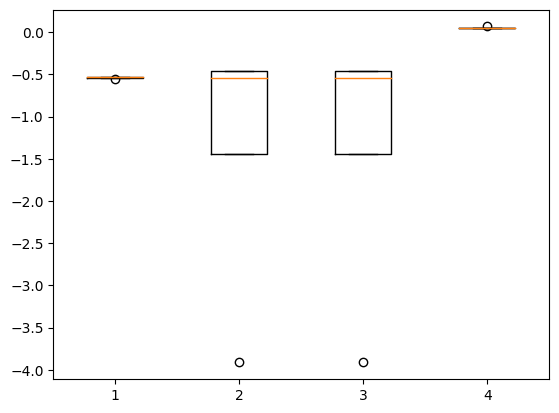

In [60]:
import matplotlib.pyplot as plt
plt.boxplot([cv_scores_lin, cv_scores_pol2, cv_scores_pol3, cv_scores_knn])
plt.show()


[-0.53286851 -0.52878709 -0.53770585 -0.52744413 -0.5316177  -0.51838361
 -0.54599058 -0.54441511 -0.52572175 -0.52433106 -0.53594667 -0.5264349
 -0.52975192 -0.53645394 -0.52883193 -0.52756796 -0.53376565 -0.54080917
 -0.52410467 -0.5328948  -0.53331152 -0.54714239 -0.52155503 -0.53514727
 -0.53577333 -0.53349807 -0.52602299 -0.52639701 -0.53572607 -0.53526683
 -0.52327868 -0.53804418 -0.53574505 -0.52286058 -0.54061997 -0.52409155
 -0.54565352 -0.52198429 -0.52684071 -0.54042373 -0.52094972 -0.53429095
 -0.54002604 -0.54734418 -0.51572067 -0.52832662 -0.54277574 -0.53498608
 -0.53427416 -0.51774758]
Mean MAE: -0.532


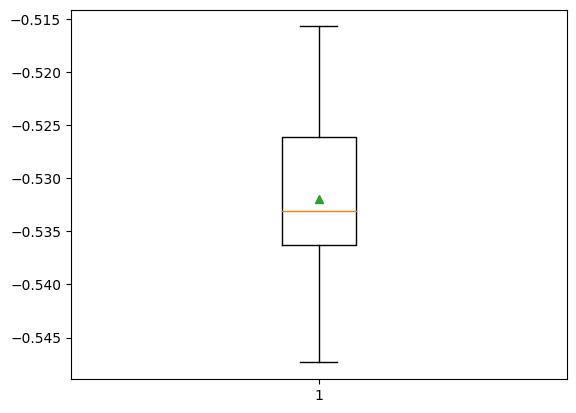

In [64]:
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', LinearRegression())])
model = TransformedTargetRegressor(regressor=LinearRegression())
cv = RepeatedKFold(n_splits=5, random_state=1)
scores_tv = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
scores = absolute(scores_tv)
s_mean = mean(scores_tv)
print(scores_tv)
print('Mean MAE: %.3f' % (s_mean))

pyplot.boxplot(scores_tv, showmeans=True)
pyplot.show()